# Chapter 3: Gridworld

Gridworld example implemented while studying reinforcement learning.


Matplotlib is building the font cache; this may take a moment.


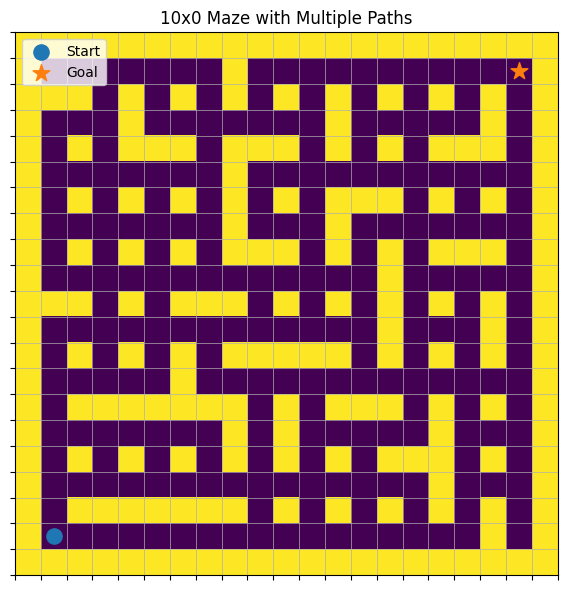

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

#셀 격자 크기 / directions - 위 오른쪽 아래 왼쪽
H, W= 10, 10 
DIRS = [ (-1,0), (0,1), (1,0) , (0,-1)] 

#이동 규칙 만들기 
def in_bounds (r, c) :
    return   0<= r < H and 0 <= c <W


def generate_maze_with_loops (loop_prob =0.25) :


#1-DFS로 스패닝 트리 생성

    visited = np.zeros( (H,W), dtype=bool)
    adj = [ [ [] for _ in range(W)] for _ in range (H)]

    stack = [ (H-1, 0) ] 

    visited [ H-1, 0] = True

    while stack :

        r, c=  stack[-1]

        nbrs = []

        for dr, dc in DIRS :

            nr, nc = r + dr, c+ dc

            if in_bounds (nr, nc) and not visited [nr, nc]:
                nbrs.append((nr,nc))

        random.shuffle(nbrs)

        if not nbrs:
            stack.pop()
            continue

        nr, nc= nbrs[0]

        visited [nr,nc]= True 

        adj[r][c].append((nr,nc))
        adj[nr][nc].append((r,c))
        stack.append((nr,nc))

#2-루프추가 

    for r in range(H) :
        for c in range (W) : 
            for dr, dc in DIRS: 
                nr, nc= r+dr, c+ dc 
                if not in_bounds(nr,nc): 
                    continue
                
                if (nr,nc) not in adj[r][c] :

                    if random.random() < loop_prob :
                        adj[r][c].append ((nr,nc))
                        adj[nr][nc].append( (r,c)) 

#3 - (2H+1) x (2W+1) 격자로 변환 1 =벽 0=길

    grid  =np.ones((2*H +1 , 2*W +1 ), dtype=int )


    for r in range(H) :
        for c in range(W): 
            gr, gc= 2*r +1 , 2*c+1 
            grid [gr,gc] = 0 
            for nr, nc in adj[r][c]: 
                ngr, ngc = 2*nr +1 , 2*nc +1 
                grid [(gr+ngr)// 2, (gc+ngc)//2] = 0

    return grid


#미로 생성 

maze_grid = generate_maze_with_loops (loop_prob = 0.30)


start_cell= (H-1,0)
goal_cell = ( 0, W-1)


start_px = (2*start_cell[0] +1 , 2*start_cell[1]+ 1)
goal_px = (2*goal_cell[0] + 1, 2*goal_cell[1]+ 1)

fig, ax= plt.subplots(figsize = (6,6))

ax.imshow(maze_grid, origin= "upper" , interpolation= "nearest")
ax.set_title ("10x0 Maze with Multiple Paths")
ax.set_xticks(np.arange(-0.5, maze_grid.shape[1],1))
ax.set_yticks(np.arange(-0.5, maze_grid.shape[0],1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(which = "both" , linewidth=0.5)

ax.scatter([start_px[1]], [start_px[0]], marker="o", s=120, label="Start")
ax.scatter([goal_px[1]],  [goal_px[0]],  marker="*", s=160, label="Goal")
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()